Support vector machines.
A type of supervised learning algorithms used for regression, classification and detecting outliers. SVMs are remarkably one of the powerful models in classical machine learning suited for handling complex and high dimensional datasets. With SVM supporting different kernels (linear, polynomial, Radial Basis Function(rbf), and sigmoid), SVM can tackle different kinds of datasets, both linear and non linear.
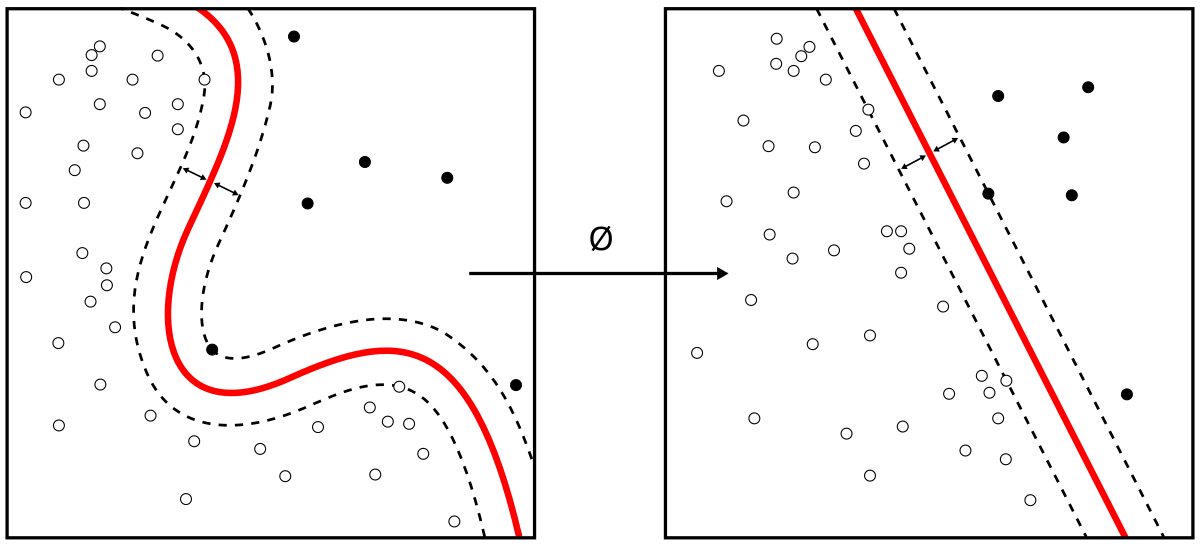

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [8]:
cal_data = download_read_data(data_path)
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
len(cal_data)

20640

Exploratory data analysis

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 18576 
The size of testing data is: 2064


In [15]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18576.0,-119.567530,2.000581,-124.3500,-121.7900,-118.4900,-118.010000,-114.4900
latitude,18576.0,35.630217,2.133260,32.5400,33.9300,34.2600,37.710000,41.9500
housing_median_age,18576.0,28.661068,12.604039,1.0000,18.0000,29.0000,37.000000,52.0000
total_rooms,18576.0,2631.567453,2169.467450,2.0000,1445.0000,2127.0000,3149.000000,39320.0000
total_bedrooms,18390.0,537.344698,417.672864,1.0000,295.0000,435.0000,648.000000,6445.0000
population,18576.0,1422.408376,1105.486111,3.0000,785.7500,1166.0000,1725.000000,28566.0000
households,18576.0,499.277078,379.473497,1.0000,279.0000,410.0000,606.000000,6082.0000
median_income,18576.0,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,206881.011305,115237.605962,14999.0000,120000.0000,179800.0000,264700.000000,500001.0000


In [17]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

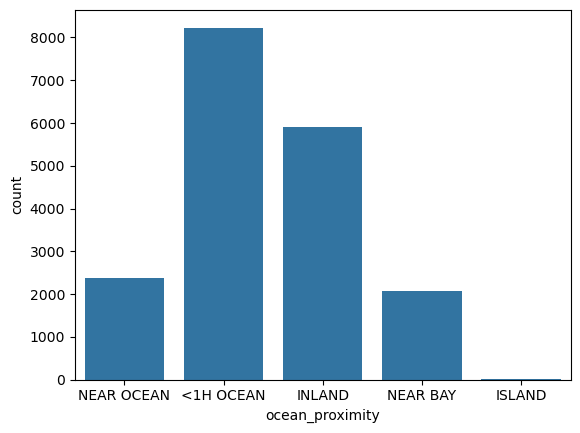

In [21]:
sns.countplot(data=train_data, x='ocean_proximity')

<Axes: ylabel='Frequency'>

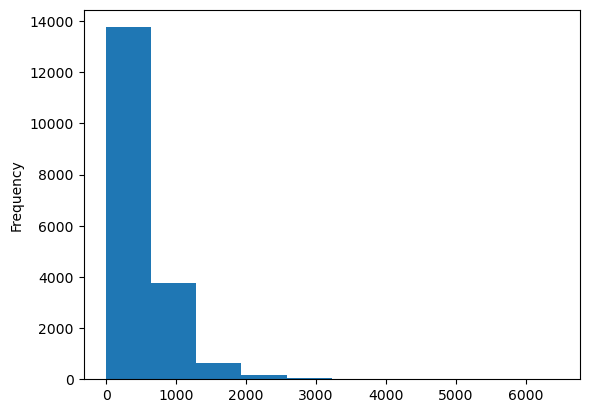

In [23]:
train_data['total_bedrooms'].plot(kind='hist')

<Axes: xlabel='longitude', ylabel='latitude'>

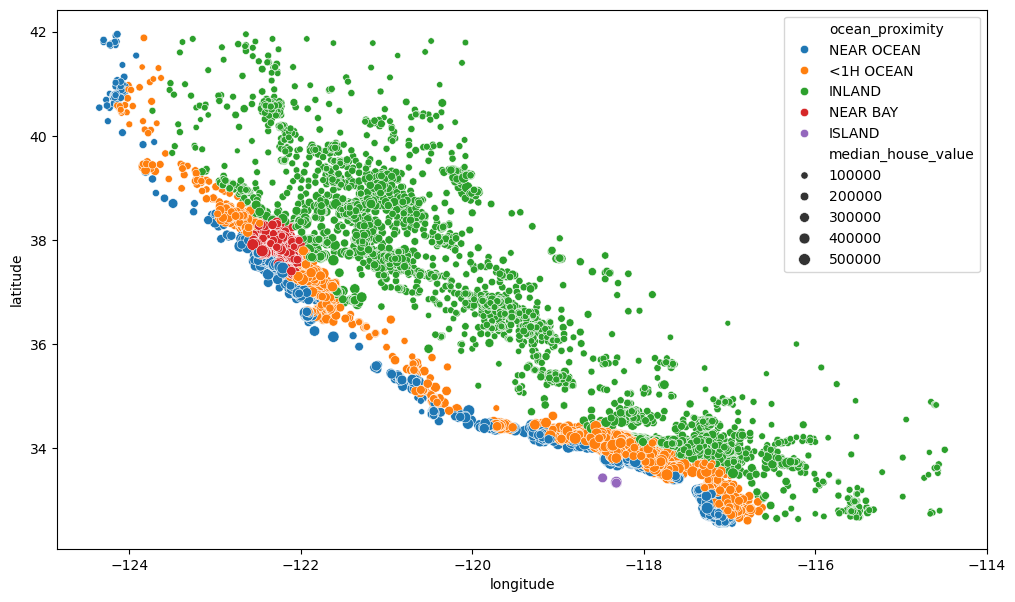

In [25]:
# Plotting geographical features

plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

In [27]:
# Getting training input data and labels

training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

# Numerical features 

num_feats = training_input_data.drop('ocean_proximity', axis=1)

# Categorical features 
cat_feats = training_input_data[['ocean_proximity']]

In [29]:
# Handle missing values 

from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())

    ])

num_preprocessed = num_pipe.fit_transform(num_feats)

In [31]:
# Pipeline to combine the numerical pipeline and also encode categorical features 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
    ('num', num_pipe, num_list),
    ('cat', OneHotEncoder(), cat_list)
])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [33]:
training_data_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

Training a support vector machine: In regression, there is no separation of classes with ddecision boundary like classification, SVR fits training data on the boundary margin but keep them off.

In [36]:
from sklearn.svm import LinearSVR, SVR

lin_svr = LinearSVR()
lin_svr.fit(training_data_preprocessed, training_labels)

C:\Users\bacch\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

Evaluate SVR (support vector regressor)

In [43]:
poly_svr = SVR(kernel='poly')
poly_svr.fit(training_data_preprocessed, training_labels)

SVR(kernel='poly')

In [44]:
from sklearn.metrics import mean_squared_error

predictions = lin_svr.predict(training_data_preprocessed)
mse = mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
rmse

215682.86713461558

In [47]:
#The error is high, what about polynomial kernel?
predictions = poly_svr.predict(training_data_preprocessed)
mse= mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
rmse

117513.38828582528

Improve SVR. We can use Randomized Search, this is a regularization hyperparameter, small gamma can underfit.
C low for too much regularization. Epsilon to control the width of the "street"

In [50]:
from sklearn.model_selection import RandomizedSearchCV


params = {'gamma':[0.0001, 0.1],'C':[1,1000], 'epsilon':[0,0.5], 'degree':[2,5]}

rnd_search = RandomizedSearchCV(SVR(), params, n_iter=10, verbose=2, cv=3, random_state=42)

rnd_search.fit(training_data_preprocessed, training_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  14.9s
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  14.9s
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  14.5s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  14.2s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  14.2s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  14.5s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  14.3s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  14.0s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.9s
[CV] END ........C=1000, degree=5, epsilon=0.5, gamma=0.0001; total time=  14.0s
[CV] END ........C=1000, degree=5, epsilon=0.5, gamma=0.0001; total time=  14.0s
[CV] END ........C=1000, degree=5, epsilon=0.5, 

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [1, 1000], 'degree': [2, 5],
                                        'epsilon': [0, 0.5],
                                        'gamma': [0.0001, 0.1]},
                   random_state=42, verbose=2)

In [53]:
rnd_search.best_params_

{'gamma': 0.1, 'epsilon': 0, 'degree': 5, 'C': 1000}

In [55]:
svr_rnd = rnd_search.best_estimator_.fit(training_data_preprocessed, training_labels)

In [ ]:
predictions = svr_rnd.predict(training_data_preprocessed)
mse = mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
rmse

Evaluate on test set. Same transformations as the training set

In [ ]:
test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']


test_preprocessed = final_pipe.transform(test_input_data)

test_pred = svr_rnd.predict(test_preprocessed)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse